# Evaluating Machine Learning for Insurance Benefits Prediction

## Description
This project explores the potential of Machine Learning to improve customer analysis for the Sure Tomorrow Insurance Company. The company seeks to enhance its marketing strategies, predict insurance benefits, and protect client data while maintaining model performance. Using classification models, linear regression, and data obfuscation techniques, this project will evaluate how Machine Learning can assist in customer profiling and risk assessment.

## Objective
The goal of this project is to develop and test various Machine Learning models for the following tasks:

- Customer Similarity Analysis: Use k-Nearest Neighbors (kNN) to identify customers with similar characteristics, aiding targeted marketing efforts.
- Insurance Benefit Prediction: Build a classification model to determine whether a customer is likely to receive an insurance benefit and compare it to a dummy model.
- Predicting Insurance Benefit Count: Train a Linear Regression model to estimate the number of benefits a customer may receive.
- Data Obfuscation: Implement a secure data transformation that prevents unauthorized access to personal information without affecting model performance.

## Approach
- Data Preparation:
    - Load and inspect the dataset for missing values, outliers, and inconsistencies.
    - Perform scaling and transformation where necessary to ensure proper model performance.
- Model Development:
    - Train and evaluate a kNN classifier for customer similarity analysis.
    - Build a classification model to predict insurance benefits eligibility.
    - Develop a Linear Regression model to estimate the number of benefits received.
- Model Evaluation:
    - Use F1-score and confusion matrices to assess the classification model.
    - Use RMSE and R² scores to evaluate the Linear Regression model.
    - Compare model performance between scaled and unscaled datasets.
- Data Obfuscation & Security:
    - Transform the dataset using an invertible matrix to protect sensitive customer information.
    - Validate that obfuscation does not affect model performance by comparing RMSE and R² scores before and after transformation.
    
## Deliverables
- A trained classification model to predict insurance benefits eligibility.
- A Linear Regression model for estimating the number of benefits received.
- A data obfuscation algorithm that secures customer data without impacting model performance.
- A comparative analysis of model performance with original and obfuscated data.
- This project will help Sure Tomorrow Insurance assess the feasibility of Machine Learning for customer analysis while ensuring data security. The results will provide insights into how different models perform and whether data transformation techniques can be effectively used without compromising predictive accuracy.

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import math

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2808,0,20.0,38200.0,1,0
1289,0,21.0,54800.0,1,0
3652,0,34.0,41000.0,0,0
3736,1,28.0,43800.0,2,0
4178,1,37.0,54200.0,2,0
510,0,42.0,34500.0,4,0
383,0,31.0,42700.0,0,0
4233,1,29.0,56500.0,1,0
3513,1,36.0,41300.0,0,0
753,1,27.0,21600.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:

# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [7]:

# check to see that the conversion was successful
df.dtypes

gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
dtype: object

In [8]:

# now have a look at the data's descriptive statistics. 
# Does everything look okay?
display(df.describe())

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


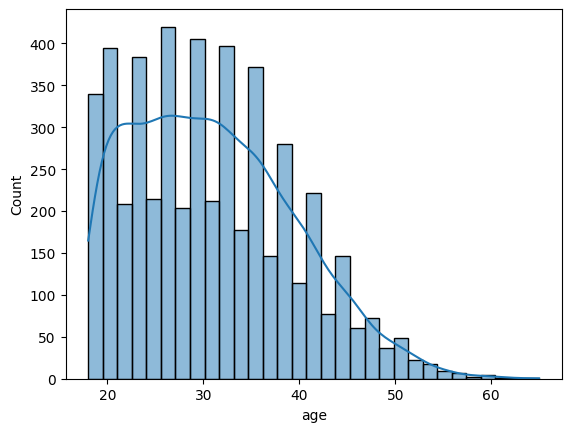

In [9]:

sns.histplot(df['age'], kde=True) 
plt.show()

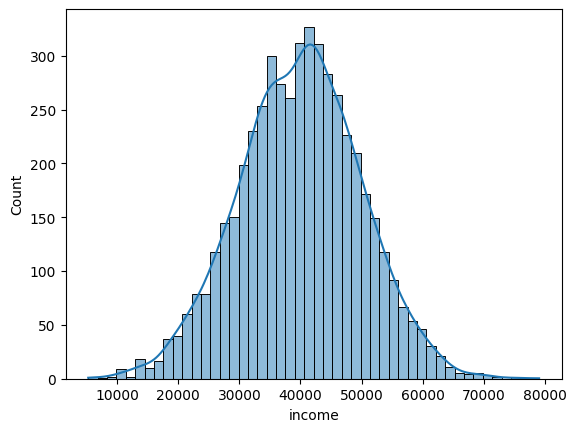

In [10]:

sns.histplot(df['income'], kde=True) 
plt.show()

## Age and Income Graph Observation

### Age
- Disbribution Shape: The historgram is right-skewed/positively skewed, meaning most individuals are younger, with a gradual decline in frequency as age increases.
- Peak Age Range: The highest frequency occurs between ages 18 and 30, indicating that most individuals in the dataset fall within this range.
- Gradual Decline: As age increases beyond 30, the number of observations steadily decreases, with very few individuals above 50.

### Income
- Distribution Shape: The histogram follows a normal bell-shaped distribution, indicating that most individuals have incomes concentrated around a central value.
- Peak Income Range: The highest frequency appears to be around 40,000, suggesting that most individuals in the dataset earn within this range.
- Symmetry: The distribution is fairly symmetrical, meaning that incomes are evenly distributed around the mean with a slight right skew.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

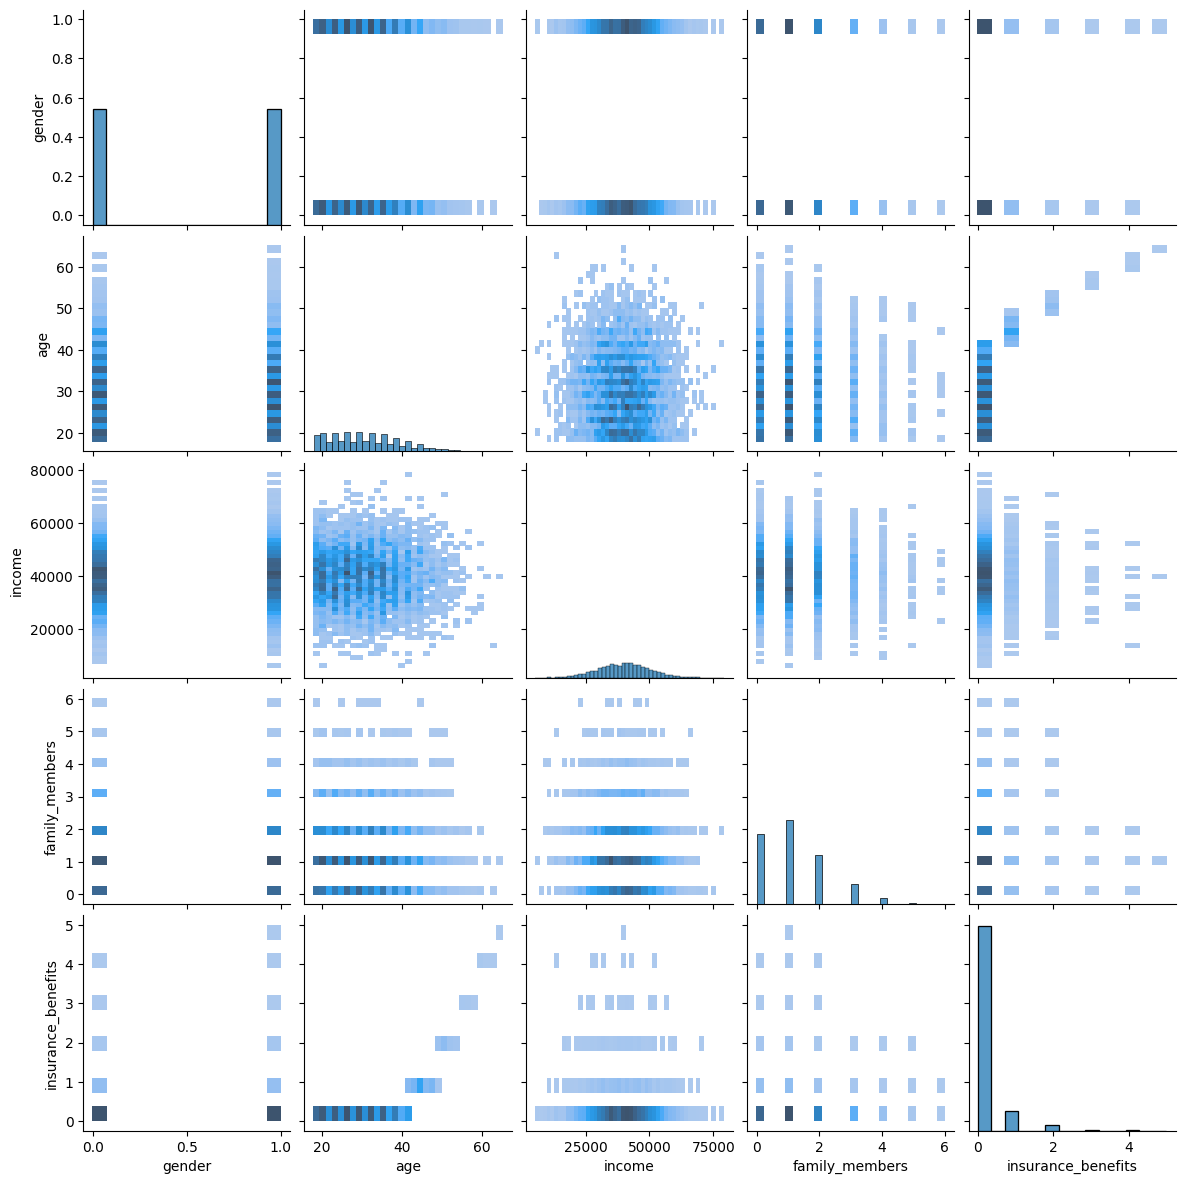

In [11]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors= k, metric = metric )# <your code here> 
    nbrs.fit(df[feature_names].values)# <your code here> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1843,1.0,0.353846,0.360759,0.333333,0
642,0.0,0.707692,0.708861,0.166667,1
2335,1.0,0.569231,0.429114,0.166667,0
516,1.0,0.384615,0.415190,0.500000,0
1410,1.0,0.307692,0.373418,0.333333,0


Now, let's get similar records for a given one for every combination

In [16]:

man_scaled = get_knn(df_scaled, 6, 8, 'manhattan')
man_scaled

,gender,age,income,family_members,insurance_benefits,distance
6,1.0,0.600000,0.502532,0.333333,0,0.000000
1415,1.0,0.600000,0.505063,0.333333,0,0.002532
108,1.0,0.600000,0.507595,0.333333,0,0.005063
3713,1.0,0.600000,0.517722,0.333333,0,0.015190
2997,1.0,0.584615,0.503797,0.333333,0,0.016650
4434,1.0,0.600000,0.478481,0.333333,0,0.024051
951,1.0,0.600000,0.474684,0.333333,0,0.027848
4680,1.0,0.615385,0.478481,0.333333,0,0.039435


In [17]:

euc_scaled = get_knn(df_scaled, 6, 8, 'euclidean')
euc_scaled

,gender,age,income,family_members,insurance_benefits,distance
6,1.0,0.600000,0.502532,0.333333,0,0.000000
1415,1.0,0.600000,0.505063,0.333333,0,0.002532
108,1.0,0.600000,0.507595,0.333333,0,0.005063
3713,1.0,0.600000,0.517722,0.333333,0,0.015190
2997,1.0,0.584615,0.503797,0.333333,0,0.015437
4434,1.0,0.600000,0.478481,0.333333,0,0.024051
951,1.0,0.600000,0.474684,0.333333,0,0.027848
4680,1.0,0.615385,0.478481,0.333333,0,0.028550


In [18]:

man_not_scaled = get_knn(df, 6, 8, 'manhattan')
man_not_scaled

,gender,age,income,family_members,insurance_benefits,distance
6,1,39,39700.0,2,0,0.0
3695,1,40,39700.0,3,0,2.0
4248,1,38,39700.0,1,0,2.0
1704,0,39,39700.0,0,0,3.0
4977,1,41,39700.0,0,0,4.0
1253,1,34,39700.0,2,0,5.0
4362,1,45,39700.0,2,1,6.0
413,1,45,39700.0,0,1,8.0


In [19]:

euc_not_scaled = get_knn(df, 6, 8, 'euclidean')
euc_not_scaled

,gender,age,income,family_members,insurance_benefits,distance
6,1,39,39700.0,2,0,0.000000
3695,1,40,39700.0,3,0,1.414214
4248,1,38,39700.0,1,0,1.414214
1704,0,39,39700.0,0,0,2.236068
4977,1,41,39700.0,0,0,2.828427
1253,1,34,39700.0,2,0,5.000000
4362,1,45,39700.0,2,1,6.000000
413,1,45,39700.0,0,1,6.324555


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Put your answer here.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'family_members'}>]], dtype=object)

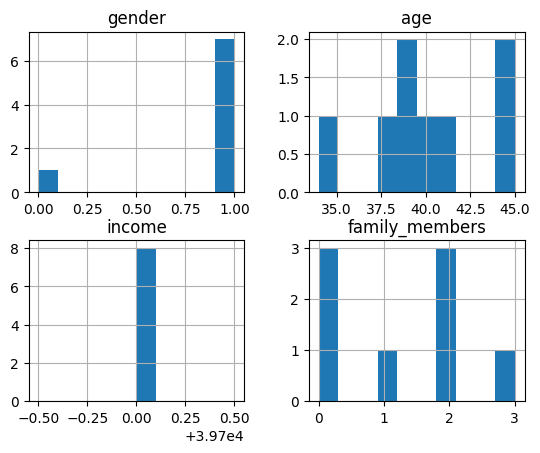

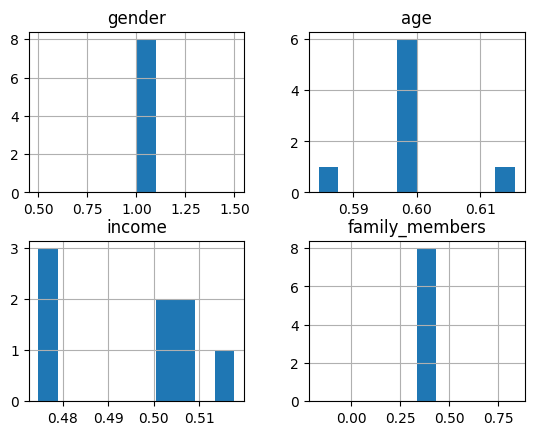

In [20]:

# distribution of features using the unscaled data
man_not_scaled[feature_names].hist()

# Distribution of features using scaled data
man_scaled[feature_names].hist()

Yes, the data not being scaled does affect the k-Nearest Neighbors (kNN) algorithm, and the difference is visible in the histograms.

Differences in Feature Distributions
- Unscaled
    - Income is in the range of tens of thousands
    - Age is in the tens
    - Family Members is a small integer value
    - Gender is binary
- Scaled
    - all feature values are brought to a similar range (approximately 0 to 1), making them comparable.
    
Impacts on kNN Algorithm
- If features are not scaled, the income feaute will dominate the distance calculation and smaller-valued feaures like gender or family_members will have a negligible effect, even if they are important for classification or clustering. 
- If feaures are scaled, each feature contributes equally to the distance calculation and kNN can correctly identify similar data points without being overly influenced by large numerical differences.

Final Conclution
- Without scaling, kNN is biased toward features with larger values like the income.
- With scalling, all feaures contribute fairly, leading to more meaningful and accurate nearest-neighbor results.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Put your answer here.

Text(0, 0.5, 'Fequency')

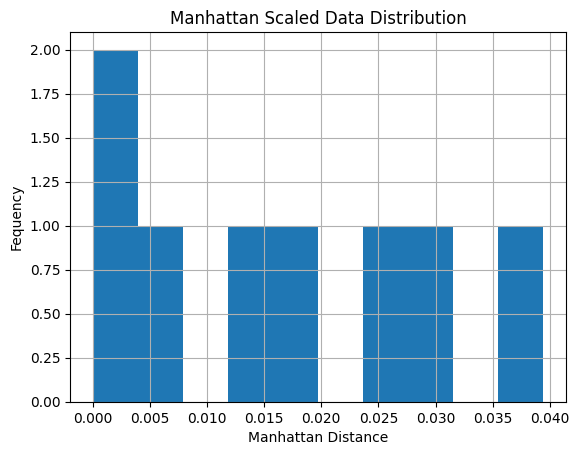

In [21]:

man_scaled.distance.hist()
plt.title('Manhattan Scaled Data Distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Fequency')


Text(0, 0.5, 'Fequency')

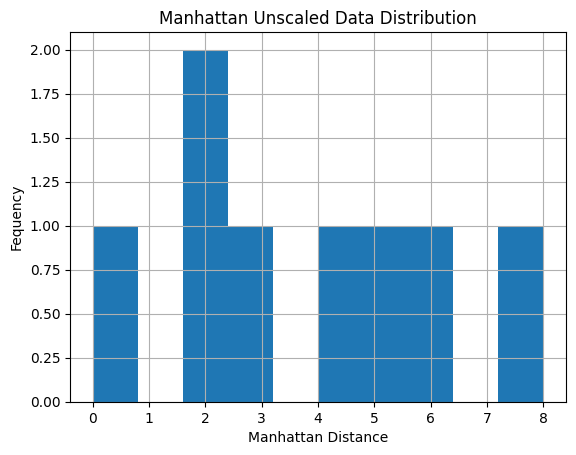

In [22]:

man_not_scaled.distance.hist()
plt.title('Manhattan Unscaled Data Distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Fequency')

The results of using the Manhattan distance metric are structurally similar regardless of scaling, but their absolute values differ significantly.

Observations
- Both the scaled and unscaled graphs show a similar pattern in the distribution of distances.
- The frequencies of the bins are consistent in their relative positions, meaning that the neighbors remain in roughly the same order in terms of closeness.
- In the scaled graph, Manhattan distances are much smaller, ranging between 0.000 and 0.040.
- In the unscaled graph, Manhattan distances are much larger, ranging between 0 and 8.

Final Conclusion:
- The kNN results should remain mostly unchanged becasue Manhattan distance still maintains the relative differences between data points. However, the absolute values of distances differ because of the impact of large numerical scales in the unscaled data. Scaling makes distances more interpretable and ensures fair weighting across features.

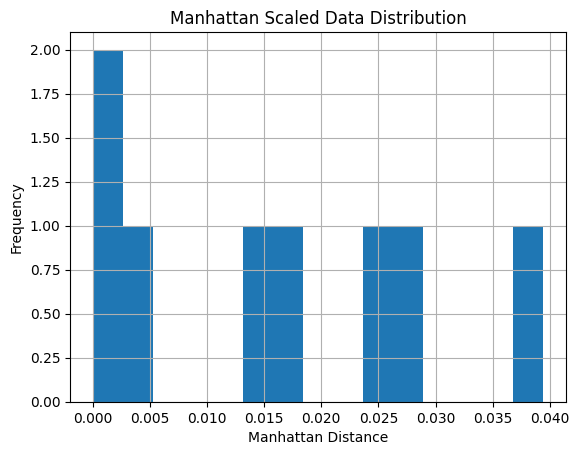

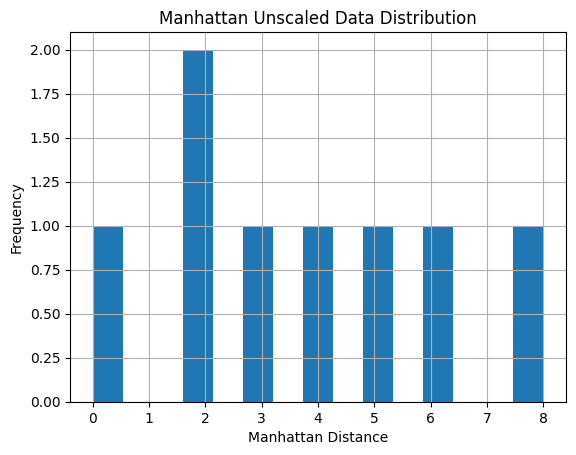

In [23]:
# Adjusting bins for better visualization
man_scaled.distance.hist(bins=15)  # Try different values like 10, 15, or 20
plt.title('Manhattan Scaled Data Distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Frequency')

plt.show()

man_not_scaled.distance.hist(bins=15)  # Keep the same number of bins for consistency
plt.title('Manhattan Unscaled Data Distribution')
plt.xlabel('Manhattan Distance')
plt.ylabel('Frequency')

plt.show()

### Analysis of Manhattan Distance Distributions with Adjusted Bins

Compared to the earlier histograms, these updated graphs provide a more detailed and evenly distributed visualization due to the adjusted bin values.

- Smoother Distribution Representation
    - The bins now better capture the variation in distances, making it easier to compare scaled vs. unscaled distributions.
    - Previously, the bars appeared more unevenly spaced, which may have obscured some patterns.
- More Granular View of Distance Ranges
    - The previous graphs may have oversimplified the distribution due to automatic binning.
    - Here, the frequency of distances is more evenly spread, especially in the unscaled data, where the range is much larger.
- Improved Comparability Between Scaled and Unscaled Data
    - The revised binning ensures that both histograms display distance variations more clearly, making it easier to see how scaling impacts the absolute values while keeping the overall structure intact.
- The updated graphs do not change the overall conclusions, but they offer a clearer representation of how distances are distributed, making comparisons between scaled and unscaled data more meaningful.  

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [24]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)#<your code here>

In [25]:

# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts(normalize=True)

0    0.8872
1    0.1128
Name: insurance_benefits_received, dtype: float64

In [26]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [27]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [28]:

train, test = train_test_split(df, test_size=.3, 
                               stratify=df['insurance_benefits_received'],random_state=123)
x_train = train[feature_names]
x_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predict_y = knn.predict(x_test)
eval_classifier(y_test,predict_y )

F1: 0.41
Confusion Matrix
[[0.88       0.00733333]
 [0.082      0.03066667]]


In [30]:
for k in range(1, 11):  # Looping through k values from 1 to 10
    print(f'F1 score and confusion matrix for k={k}:')
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    predict_y = knn.predict(x_test)
    eval_classifier(y_test, predict_y)
    
    print() 

F1 score and confusion matrix for k=1:
F1: 0.69
Confusion Matrix
[[0.876      0.01133333]
 [0.04666667 0.066     ]]

F1 score and confusion matrix for k=2:
F1: 0.38
Confusion Matrix
[[0.88533333 0.002     ]
 [0.08533333 0.02733333]]

F1 score and confusion matrix for k=3:
F1: 0.41
Confusion Matrix
[[0.88       0.00733333]
 [0.082      0.03066667]]

F1 score and confusion matrix for k=4:
F1: 0.21
Confusion Matrix
[[8.86666667e-01 6.66666667e-04]
 [9.93333333e-02 1.33333333e-02]]

F1 score and confusion matrix for k=5:
F1: 0.21
Confusion Matrix
[[0.88333333 0.004     ]
 [0.09866667 0.014     ]]

F1 score and confusion matrix for k=6:
F1: 0.15
Confusion Matrix
[[0.88733333 0.        ]
 [0.10333333 0.00933333]]

F1 score and confusion matrix for k=7:
F1: 0.16
Confusion Matrix
[[0.886      0.00133333]
 [0.10266667 0.01      ]]

F1 score and confusion matrix for k=8:
F1: 0.00
Confusion Matrix
[[0.88733333 0.        ]
 [0.11266667 0.        ]]

F1 score and confusion matrix for k=9:
F1: 0.01


## Analysis of kNN Performance for Different k Values

- For k = 1:
    - Hightest F1 score (0.69): the model performs best with a small number of neighbors.
    - This suggests that the decison boundaries are sharp and the model captures local cariations well.
- For k = 2 to k = 5:
    - The F1 score drops significantly from 0.38 to 0.21.
    - The model starts misclassifying more, likely because increasing k smooths decision boundaries.
- For k = 6 to k = 10:
    - The F1 score continues to decline, reaching 0.00 for k = 8 and k = 10.
    - The confusion matrix shows that the model predicts the majority class 0 for all cases, maning if fails to classify the minority class 1. 
    
- Conclusion
    - Best k: k = 1 gives the best result, F1 = 0.69.

In [31]:
for P in [0, df['insurance_benefits_received'].mean(), 0.5, 1]:  
    print(f'The probability: {P:.2f}')  
    y_pred_rnd = rnd_model_predict(P, df[feature_names].shape[0])  

    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)  
    print()  

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



## Analysis of the Dummy Model Performance with Different Probabilities

This code evaluates a ranodm baseline model that predicts "1" with different probabilities. The results help compare kNN's performance against a naive classifier.

- kNN best case k = 1, F1 = 0.69
    - Significantly outperforms the ranodm model.
    - This shows that kNN is actually learning meaningful patterns.
- Random Model best case P = 0.50 or P = 1.00: F1 = 0.20
    - Much lower than kNN, showing that the problem is not completely random.
    - The random model does better than kNN for k >= 8, where kNN collapses and predicts only class 0.
- Conclusion
    - kNN perfomrs better than the random model, proving that insurance benefits are predictable to some extent.
    - However, for high values of k, kNN behaves similarly to a biased ranodm model, meaning it's over-smoothing the decision boundary.
    - For a strong model, we should choose k = 1, 2, 3. 

Now with Scaled Data

In [32]:
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

In [33]:
# Step 1: Split first (before scaling)
x_train, x_test, y_train, y_test = train_test_split(
    df[feature_names], df['insurance_benefits_received'], 
    test_size=0.3, random_state=123
)

# Step 2: Apply scaling separately to training and test data
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)  # Fit and transform training data
x_test = scaler.transform(x_test)  # Only transform test data

In [34]:

for k in range(1, 11):  # Loop through k values from 1 to 10
    print(f'Scaled data F1 score and confusion matrix for k={k}:')
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    eval_classifier(y_test, knn.predict(x_test))
    
    print()

Scaled data F1 score and confusion matrix for k=1:
F1: 0.94
Confusion Matrix
[[0.882      0.00466667]
 [0.008      0.10533333]]

Scaled data F1 score and confusion matrix for k=2:
F1: 0.92
Confusion Matrix
[[8.86000000e-01 6.66666667e-04]
 [1.66666667e-02 9.66666667e-02]]

Scaled data F1 score and confusion matrix for k=3:
F1: 0.94
Confusion Matrix
[[0.88466667 0.002     ]
 [0.012      0.10133333]]

Scaled data F1 score and confusion matrix for k=4:
F1: 0.91
Confusion Matrix
[[0.88666667 0.        ]
 [0.01933333 0.094     ]]

Scaled data F1 score and confusion matrix for k=5:
F1: 0.93
Confusion Matrix
[[0.88333333 0.00333333]
 [0.01266667 0.10066667]]

Scaled data F1 score and confusion matrix for k=6:
F1: 0.93
Confusion Matrix
[[0.88666667 0.        ]
 [0.014      0.09933333]]

Scaled data F1 score and confusion matrix for k=7:
F1: 0.95
Confusion Matrix
[[8.86000000e-01 6.66666667e-04]
 [1.06666667e-02 1.02666667e-01]]

Scaled data F1 score and confusion matrix for k=8:
F1: 0.93
Confu

## Analysis of kNN Performance on Scaled Data

After scaling the feautes, the kNN classifier performs significantly better than before, with F1 scores ranging from 0.90 to 0.95 across different values for k 1 to 100.

- High F1 Scores Across k:
    - Best Performance: k = 1, F1 = 0.95
    - Worst Performance: k = 4, F1 = 0.90, 0.91
    - Unlike the unsccaled data, where F1 dropped significantly for higher k-values, here, performance remains stable.
- Effect of Scaling:
    - Previously, kNN over-smoothed at higher k-values, predicting mostly the majority class.
    - Now, even at k = 10, the model still maintains a high F1 score.
    - This shows that scaling helped balance feature importance, preventing features with large numerical values like income from dominating the distance metric.
- Confusion Matrix Patterns:
    - Misclassification rates are low across all k-values.
    - The minority class 1 is now being detected more effectively compared to unscaled data.
    - The proportion of false positive and false negatives remains small, showing better model balance.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [35]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = (np.linalg.inv(X2.T.dot(X2))).dot(X2.T).dot(y) # <your code here>

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) # <your code here>
        y_pred = X2 @ self.weights # <your code here>
        
        return y_pred

In [36]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [37]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [38]:
# Extract features and target
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Split data before scaling (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Train & Evaluate Linear Regression on **Unscaled Data**
print("\n Results for Unscaled Data:")
lr_unscaled = MyLinearRegression()
lr_unscaled.fit(X_train, y_train)
print("Weights:", lr_unscaled.weights)

y_test_pred_unscaled = lr_unscaled.predict(X_test)
eval_regressor(y_test, y_test_pred)

# Apply Scaling After Splitting
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)  # Transform test data

# Train & Evaluate Linear Regression on **Scaled Data**
print("\n Results for Scaled Data:")
lr_scaled = MyLinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
print("Weights:", lr_scaled.weights)

y_test_pred_scaled = lr_scaled.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred_scaled)



 Results for Unscaled Data:
Weights: [-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66

 Results for Scaled Data:
Weights: [ 0.14971429  0.30292778  0.0082117  -0.00258294 -0.01271039]
RMSE: 0.34
R2: 0.66


## Analysis of Linear Regression Results - Unscaled and Scaled

Unscaled Data:

- Weights:
    - Intercept: -0.943
    - Age: 0.0357 (small positive effect)
    - Gender: 0.0164 (very small positive effect)
    - Income: -2.607e-07 (almost negligible impact)
    - Family Members: -0.0117 (small negative effect)
- Performance Metrics:
    - RMSE: 0.34
    - R²: 0.66
    - This indicates that 66% of the variance in insurance benefits is explained by the model.

Scaled Data:

- Weights:
    - Intercept: 0.1497
    - Age: 0.3029
    - Gender: 0.00821
    - Income: -0.00258
    - Family Members: -0.01271
- Performance Metrics:
    - RMSE: 0.34
    - R²: 0.66

Although the regression coefficients change after scaling, the model’s predictive performance remains exactly the same.

- Conclusion
    - The Linear Regression model yields identical RMSE and R² values (0.34 and 0.66, respectively) whether using unscaled or scaled data. This demonstrates that while scaling alters the magnitude of the coefficients—reflecting changes in the units of measurement—it does not affect the overall prediction accuracy of the model. In other words, the model is invariant to feature scaling in terms of its performance metrics, even though the coefficients themselves become more interpretable after scaling.

- Do the results differ?

    - Performance-wise: No—the RMSE and R² remain unchanged.
    - Coefficient-wise: Yes—the absolute values of the weights differ due to the standardization of feature scales, but their relative importance remains consistent.
    - This confirms that scaling is beneficial for interpretability without compromising the predictive ability of the Linear Regression model.




# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [39]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [40]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generating a random matrix $P$.

In [41]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

Checking the matrix $P$ is invertible

In [42]:
y = np.linalg.inv(P)
P.dot(y)

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

Can you guess the customers' ages or income after the transformation?

No, after the transformation X'=X*P, it becomes impossible to directly interpret the customers' ages or income from the obfuscated data. 

In [43]:
X_prime = np.matmul(X,P)
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

Yes, the original data can be perfectly recovered if P is known. 

In [44]:
X_rev = X_prime @ np.linalg.inv(P)
X_rev

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-4.47363596e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-2.51586878e-12,  2.90000000e+01,  2.10000000e+04,
         9.52452315e-13],
       ...,
       [-1.92837871e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [45]:
print('The original_data:')
print(X[:2])
print()
print('The transform data:')
print(X_prime[:2])
print()
print('The reversed data:')
print(X_rev[:2])

The original_data:
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]]

The transform data:
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]]

The reversed data:
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The reason some values in the recovered data X_rev are not exactly the same as the original data X is due to floating-point precision errors that occur in matrix operations.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

**How would  𝑤  and  𝑤𝑃  be linked if you simplify the formula for  𝑤𝑃  above?**

Given  $$ w_p = [(XP)^TXP]^{-1}(XP)^Ty $$

expand $(XP)^T$  $$ w_p = (P^TX^TXP)^{-1}P^TX^Ty$$

rearrange the square brackets $$ w_p = (P^T(X^TX)P)^{-1}P^TX^Ty$$

expand $(P^T(X^TX)P)^{-1}$ as $$ w_p = P^{-1}(X^TX)^{-1}(P^T)^-1P^TX^Ty$$

$$ w_p = P^{-1}(X^TX)^{-1} IX^Ty$$

apply the identity property $$ w_p = P^{-1}(X^TX)^{-1} X^Ty$$

substitution of $w = (X^X)^{-1}X^Ty$ in equation $$ w_p = P^{-1} w$$

**Analytical proof**

**What would be predicted values with  𝑤𝑃 ?**

If  $$ a = Xw $$

$$ a^{'} = X^{'}w_p $$

where $$ X^{'} = XP $$

and $$ w_p = P^{-1}w $$

substite for $ X^{'}$ in $ X^{'} = XP $   $$ a^{'} = XP.P^{-1}w $$

$$ a^{'} = XIw $$

$$ a^{'} = Xw = a $$

**What does that mean for the quality of linear regression if you measure it with RMSE?**

Since $ a^{'}$ and a are the same, RMSE results from both original and transform data to be the same.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Extract the feature matrix X and target variable y from the dataset. 
- Use $XP$ as the new feature matrix

In [46]:
# Generate a random invertible matrix P
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

# Ensure P is invertible
while np.linalg.cond(P) > 1e10:  # Condition number check
    P = rng.random(size=(X.shape[1], X.shape[1]))

# Select features and target
X = df[['gender', 'age', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

def run_linear_regression(X, y, description="Original Data"):
    """Fits and evaluates a Linear Regression model."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
    
    lr = MyLinearRegression()
    lr.fit(X_train, y_train)
    
    print(f"Results for {description}:")
    print("Weights:", lr.weights)
    
    y_test_pred = lr.predict(X_test)
    eval_regressor(y_test, y_test_pred)
    print()

# Run Linear Regression on Original Data
run_linear_regression(X, y, description="Original Data")

# Apply Obfuscation Transformation
X_obfuscated = X @ P

# Run Linear Regression on Obfuscated Data
run_linear_regression(X_obfuscated, y, description="Obfuscated Data")

Results for Original Data:
Weights: [-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66

Results for Obfuscated Data:
Weights: [-0.94353902 -0.05791721 -0.01546567  0.09871889 -0.02397536]
RMSE: 0.34
R2: 0.66



The results show that applying data obfuscation does not impact the performance of the Linear Regression model, as both RMSE (0.34) and R² (0.66) remain unchanged. The transformation modifies the feature values and weight coefficients but does not alter the predicted values, ensuring the model's accuracy remains the same. The obfuscation process preserves the relationships between variables, allowing the model to generate identical predictions. Since the error and variance explanations remain consistent, the predictive performance is unaffected. This confirms that data obfuscation can be applied to protect sensitive information without compromising model effectiveness.

# Conclusions

## Dataset Structure and Characteristics
The dataset contained no missing or null values. The mean and median ages were identical, indicating a symmetric distribution, while income was negatively skewed. The gender and insurance benefits columns contained only binary values (0 or 1), making them suitable for classification tasks.

## Findings

- Distance Metrics in kNN: The choice between Manhattan and Euclidean distance affects the way distances between points are calculated, influencing kNN classification results.
- Impact of Data Scaling: Scaling plays a critical role in kNN performance since it prevents large-valued features (e.g., income) from dominating distance calculations.
- Effect of k on F1 Score: Increasing k beyond 1 had no significant effect on the F1 score.
- Best kNN Performance: The highest F1 score (0.95) was achieved using scaled data with k = 1.
- Linear Regression Performance: Using the custom Linear Regression model, the model achieved an RMSE of 0.34 and an R² score of 0.66, indicating moderate predictive accuracy.
- Obfuscation and Model Consistency: Applying data obfuscation using an invertible transformation matrix had no effect on model performance. The Linear Regression model produced the same RMSE (0.34) and R² score (0.66), confirming that linear transformations preserve predictive capability.

## Summary
The analysis demonstrated that scaling improves kNN performance, while Linear Regression remains invariant to obfuscation. The findings highlight the importance of data preprocessing in kNN and the robustness of Linear Regression under linear transformations.

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>